[View in Colaboratory](https://colab.research.google.com/github/kumarshankar/FADML-Project/blob/master/Ransomware_lstm.ipynb)

In [0]:

import pandas as pd
import matplotlib.pyplot as plt

In [166]:
from google.colab import files
uploaded = files.upload()

Saving regular.txt to regular (1).txt


In [167]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
dataset = pd.read_csv('regular.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [0]:
data_instr = dataset.iloc[:,[0]]

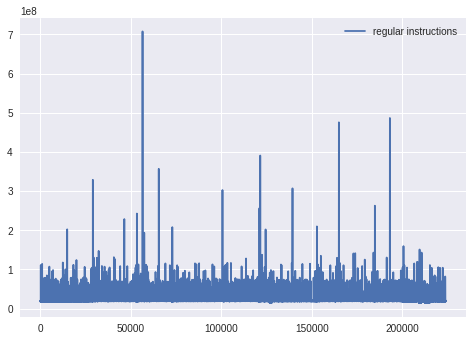

In [338]:
plt.plot(data_instr)
plt.legend(["regular instructions"])
plt.show()

(224105, 1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
np.random.seed(7)

In [0]:
dataset = data_instr.values
dataset = dataset.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [239]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

150150 73955


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [241]:
dataset.shape

(224105, 1)

In [0]:
# reshape into X=t and Y=t+1
look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [243]:
trainX.shape

(150099, 50)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [245]:
trainX.shape

(150099, 1, 50)

In [246]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=60, verbose=1)

Epoch 1/1
150099/150099 [==============================] - 24s 163us/step - loss: 3.5454e-05


In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [248]:
trainPredict

array([[0.00793617],
       [0.00789359],
       [0.00789782],
       ...,
       [0.00794095],
       [0.00792781],
       [0.00795441]], dtype=float32)

In [249]:
trainY

array([0.0082897 , 0.00780392, 0.00872694, ..., 0.00848012, 0.00861828,
       0.00848576], dtype=float32)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [251]:
trainPredict,trainY

(array([[19096110.],
        [19066564.],
        [19069496.],
        ...,
        [19099424.],
        [19090306.],
        [19108766.]], dtype=float32),
 array([[19341428.47938939, 19004336.01571882, 19644840.13240687, ...,
         19473567.94962879, 19569440.25177718, 19477484.32296054]]))

In [252]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4088874.82 RMSE
Test Score: 4036451.74 RMSE


In [197]:
from google.colab import files
upload = files.upload()

Saving ransomware.txt to ransomware (1).txt


In [198]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
ransom_data = pd.read_csv('ransomware.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [0]:
ransom_data_instr = ransom_data.iloc[:,[0]]

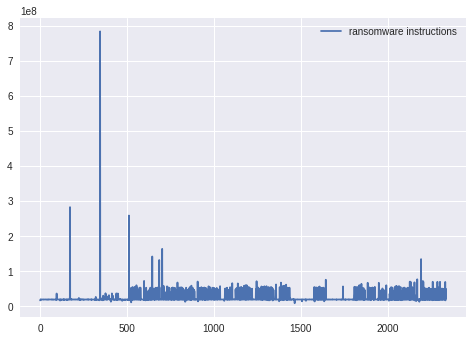

In [336]:
plt.plot(ransom_data_instr)
plt.legend(["ransomware instructions"])
plt.show()

In [0]:
np.random.seed(7)
ransom_data_instr1 = ransom_data_instr.values
ransom_data_instr1 = ransom_data_instr.astype('float32')

In [0]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
ransom_data_instr2 = scaler1.fit_transform(ransom_data_instr1)

In [0]:
look_back = 50
X, Y = create_dataset(ransom_data_instr2, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
dataX = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [0]:
ransomPredict = model.predict(dataX)

In [300]:
Y[0]

0.013069375501036462

In [299]:
ransomPredict[0]

array([0.00912772], dtype=float32)

In [0]:
ransomPredict_unscaled = scaler1.inverse_transform(ransomPredict)

In [319]:
ransomPredict_unscaled[0]

array([15996027.], dtype=float32)

In [303]:
Y

array([0.01306938, 0.01367908, 0.01375489, ..., 0.01034546, 0.01355177,
       0.05309854])

In [0]:
Y1 = scaler1.inverse_transform([Y])

In [305]:
Y1[0][0]

19049222.0

In [0]:
ss = np.abs(Y1 - ransomPredict_unscaled)

In [325]:
ss[0][0]

3053195.0

In [0]:
std = np.std(ransomPredict_unscaled)

In [327]:
std

1429854.4

In [328]:
ransomPredict_unscaled.mean()

17568224.0

In [313]:
Y1.mean()

26600359.678196147

In [0]:
UL = ransomPredict_unscaled.mean() + 3 * ransomPredict_unscaled.std()

In [342]:
ransomPredict_unscaled

array([15996027.], dtype=float32)

In [224]:
ransomPredict_unscaled.mean()

362872900000000.0

In [345]:
Y1

array([[19049222., 19521498., 19580224., ..., 16939286., 19422884.,
        50055736.]])

In [0]:
anomalies = np.where(Y1>=UL)

In [333]:
anomalies[0].shape

(636,)

In [346]:
ransomPredict_unscaled.shape

(2284, 1)

In [347]:
Y1.shape

(1, 2284)

In [0]:
df = pd.DataFrame({'observed':np.array(Y1[0,:]),'predicted':np.array(ransomPredict_unscaled[:,0])})

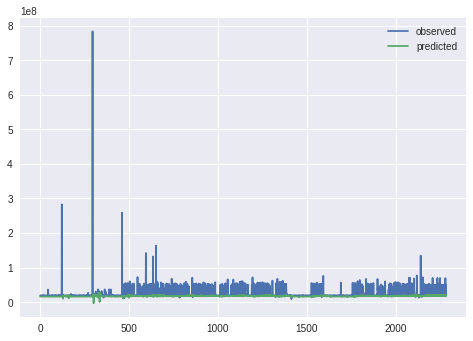

In [351]:
plt.plot(df)
plt.legend(['observed','predicted'])

In [0]:
##### 636  anomalies detected by running on instructions